In [1]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


In [2]:

import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive

# Kết nối với Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/My Drive/dataset.zip"

Archive:  /content/drive/My Drive/dataset.zip
   creating: dataset/images/
   creating: dataset/images/tests/
   creating: dataset/images/tests/Alejandro_Toledo/
  inflating: dataset/images/tests/Alejandro_Toledo/Alejandro_Toledo_0001.jpg  
  inflating: dataset/images/tests/Alejandro_Toledo/Alejandro_Toledo_0002.jpg  
  inflating: dataset/images/tests/Alejandro_Toledo/Alejandro_Toledo_0003.jpg  
  inflating: dataset/images/tests/Alejandro_Toledo/Alejandro_Toledo_0004.jpg  
  inflating: dataset/images/tests/Alejandro_Toledo/Alejandro_Toledo_0005.jpg  
   creating: dataset/images/tests/Ariel_Sharon/
  inflating: dataset/images/tests/Ariel_Sharon/Ariel_Sharon_0001.jpg  
  inflating: dataset/images/tests/Ariel_Sharon/Ariel_Sharon_0002.jpg  
  inflating: dataset/images/tests/Ariel_Sharon/Ariel_Sharon_0003.jpg  
  inflating: dataset/images/tests/Ariel_Sharon/Ariel_Sharon_0004.jpg  
  inflating: dataset/images/tests/Ariel_Sharon/Ariel_Sharon_0005.jpg  
  inflating: dataset/images/tests/Ariel_

In [5]:
train_dir="dataset/images/trains"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 1803 images belonging to 20 classes.


In [6]:
len(classes)


20

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [9]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
57/57 [==============================] - 197s 3s/step - loss: 2.2624 - accuracy: 0.3611
Epoch 2/30
57/57 [==============================] - 194s 3s/step - loss: 1.1582 - accuracy: 0.6500
Epoch 3/30
57/57 [==============================] - 194s 3s/step - loss: 0.5757 - accuracy: 0.8297
Epoch 4/30
57/57 [==============================] - 191s 3s/step - loss: 0.3156 - accuracy: 0.9174
Epoch 5/30
57/57 [==============================] - 197s 3s/step - loss: 0.1752 - accuracy: 0.9490
Epoch 6/30
57/57 [==============================] - 191s 3s/step - loss: 0.0971 - accuracy: 0.9806
Epoch 7/30
57/57 [==============================] - 191s 3s/step - loss: 0.0586 - accuracy: 0.9900
Epoch 8/30
57/57 [==============================] - 191s 3s/step - loss: 0.0522 - accuracy: 0.9884
Epoch 9/30
57/57 [==============================] - 200s 4s/step - loss: 0.0229 - accuracy: 0.9989
Epoch 10/30
57/57 [==============================] - 190s 3s/step - loss: 0.0115 - accuracy: 0.9994
Epoch 11/

In [10]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0]+ "_" + (image_path.split("/")[-1]).split("_")[1])
    print("Predicted: "+classes[np.argmax(pred)])

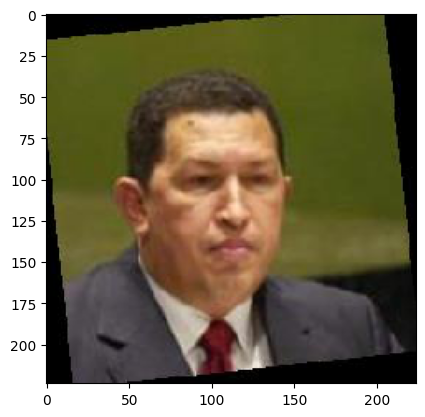

1/1 [==============================] - 0s 200ms/step
Actual: Hugo_Chavez
Predicted: Hugo_Chavez


In [11]:
predict_image("dataset/images/tests/Hugo_Chavez/Hugo_Chavez_0001.jpg")


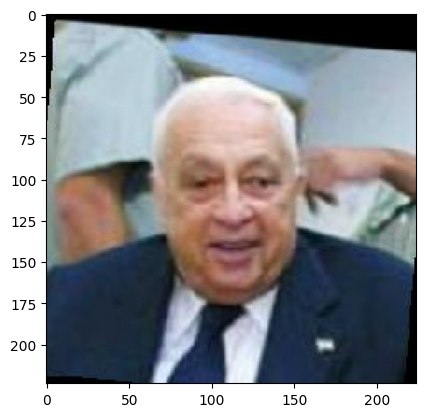

1/1 [==============================] - 0s 42ms/step
Actual: Ariel_Sharon
Predicted: Ariel_Sharon


In [12]:
predict_image("dataset/images/tests/Ariel_Sharon/Ariel_Sharon_0002.jpg")


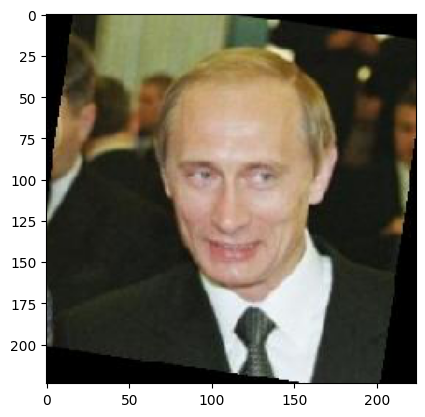

1/1 [==============================] - 0s 42ms/step
Actual: Vladimir_Putin
Predicted: Vladimir_Putin


In [14]:
predict_image("dataset/images/tests/Vladimir_Putin/Vladimir_Putin_0005.jpg")
